In [1]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

In [3]:
import sys
print sys.version

2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]


In [2]:
# Author: Patrick 't Jong


======================
Reading the graph TSV.
======================

Import the graph from the file.



In [2]:
import networkx as nx

with open("mentiongraph-small.csv", 'rb') as data:
    next(data, '')   # skip a line
    G = nx.read_edgelist(data, delimiter=",", nodetype=str, data=[("weight", int),('date',str)], create_using=nx.DiGraph())

print "# of Nodes: ", G.number_of_nodes()
print "# of Edges: ", G.number_of_edges()

# of Nodes:  62891
# of Edges:  68562


In [4]:
print "density of the network: ", nx.density(G)

density of the network:  1.73345823611e-05


## Calculation of In/Outdegree.


Degree sequence calculation and plot.

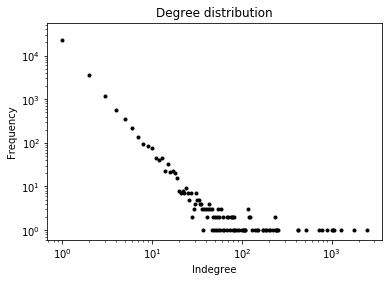

In [5]:
#InDegree sequence calculation
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot sequence as distribution
fig, ax = plt.subplots()
ax.plot(deg, cnt, 'k.')
ax.set(xlabel='Indegree', ylabel='Frequency',
       title='Degree distribution')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.grid()
fig.savefig("s_indegree.png")
plt.show()

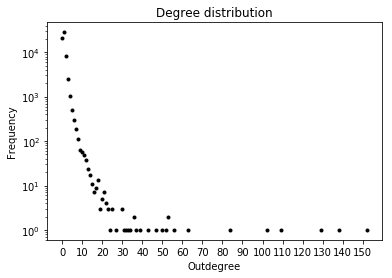

In [6]:
#OutDegree sequence calculation
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot sequence as distribution
fig, ax = plt.subplots()
ax.plot(deg, cnt, 'k.')
ax.set(xlabel='Outdegree', ylabel='Frequency',
       title='Degree distribution')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_yscale('log')
#ax.grid()
fig.savefig("s_outdegree.png")
plt.show()

## Distance distribution
We use a 95% confindence level and 5% margin of error, the ideal sample size will be 382 nodes. We take this sample from the network and calculate the avg distance to calculate in order to plot the distance distribution.

Text(0,0.5,'Frequency')

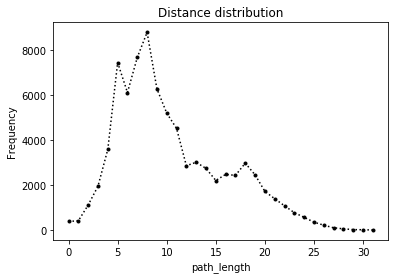

In [7]:
import random
k = 382
sampled_nodes = random.sample(G.nodes, k)
First = True

for node in sampled_nodes:
    path_length=nx.single_source_shortest_path_length(G, node)
    df = pd.DataFrame({'path_length':path_length.values()})
    if (First):
        dftotal = df.groupby(['path_length']).size()
        First = False
    else: 
        dftotal = dftotal.add(df.groupby(['path_length']).size(), fill_value=0)

ax = dftotal.plot(style='k.:',title='Distance distribution')
ax.set_ylabel("Frequency")

## Calculation average clustering coefficient.

The network is imported as undirected graph to allign with the calculation possibilities within NetworkX.


In [4]:
#Import as undirected graph
with open("mentiongraph-small.csv", 'rb') as data:
    next(data, '')   # skip a line
    GU = nx.read_edgelist(data, delimiter=",", nodetype=str, data=[("weight", int),('date',str)])
print(nx.average_clustering(GU))

0.0531863458991


## Giant Component, size and distance distribution

Largest weakly connected component of this network. If the giant component network exceeds 500 nodes we will take a sample.

In [5]:
#Use the undirected graph import
largest = max(nx.connected_component_subgraphs(GU), key=len)
print "# of nodes in the largest connected component: ", len(largest.nodes())
print "# of edges in the largest connected component: ", len(largest.edges())

# of nodes in the largest connected component:  39297
# of edges in the largest connected component:  53605


In [6]:
nx.write_gexf(largest, "C:\\SNA\small_giant.gexf")

Text(0,0.5,'Frequency')

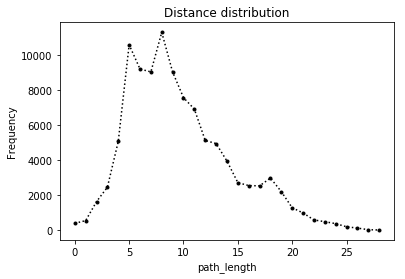

In [17]:
largest = max(nx.connected_component_subgraphs(GU), key=len)
largestsize = largest.number_of_nodes() 
k = largestsize
if (largestsize > 500):
    k = 384
sampled_nodes = random.sample(largest.nodes, k)
First = True

for node in sampled_nodes:
    path_length=nx.single_source_shortest_path_length(G, node)
    df = pd.DataFrame({'path_length':path_length.values()})
    if (First):
        dftotal = df.groupby(['path_length']).size()
        First = False
    else: 
        dftotal = dftotal.add(df.groupby(['path_length']).size(), fill_value=0)

ax = dftotal.plot(y='distance', style='k.:',title='Distance distribution')
ax.set_ylabel("Frequency")

## Calculation weak/strong components.

Calculation of number of weakly/strongly connected components.

In [12]:
print "# of weakly connected components:   ", len(list(nx.weakly_connected_components(G)))
print "# of strongly connected components: ", len(list(nx.strongly_connected_components(G)))

# of weakly connected components:    10061
# of strongly connected components:  62016


# TOP 20 users

In [13]:
import heapq
#Using the fasted way to full sort a unbounded dict with heapq
def printtop20(score):
    i = 0
    for user in heapq.nlargest(20, score, key=score.get):
        i += 1
        if len(user) < 10:
            space = "\t\t"
        else:
            space = "\t"
        print i, ": ", user, space, score[user]

## Betweenness centrality
Centrality in a graph based on shortest paths.<br> Betweenness centrality is a slow calculation. The algorithm used by networkx is O(VE) where V is the number of vertices and E the number of edges, this is going to take too long. A good alternative is to use an approximate measure. The standard betweenness measure considers every single pair of nodes and the paths between them. Networkx offers an alternative which uses a random sample of just k nodes and then finds shortest paths between those k nodes and all other nodes in the network. We will use the giant component as sample.

In [14]:
printtop20(nx.betweenness_centrality(largest))

1 :  theiphoneblog 	0.518542751278
2 :  reneritchie 	0.370779200475
3 :  iphoneincanada 	0.366680541876
4 :  filjedi 		0.321740302988
5 :  msproductions 	0.289779638228
6 :  webaddict 		0.234848076232
7 :  dgshaw 		0.214784914716
8 :  johnbiggs 		0.214784914716
9 :  techcrunch 	0.198423111799
10 :  razorianfly 	0.197570861279
11 :  evansrobert 	0.179611650485
12 :  mayhemstudios 	0.158788088426
13 :  richardlai 	0.142347724466
14 :  christyxcore 	0.134194964276
15 :  8a22a 		0.128347443053
16 :  alyssa_milano 	0.123270484499
17 :  velgor 		0.123270484499
18 :  reelsmart 		0.115883401341
19 :  talosman 		0.111889686225
20 :  krystynchong 	0.111854118787


## Closeness centrality
Calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph

In [15]:
printtop20(nx.closeness_centrality(largest))

1 :  techcrunch 	0.222820236814
2 :  theiphoneblog 	0.200970873786
3 :  squarespace 	0.195652173913
4 :  reneritchie 	0.188868613139
5 :  johnbiggs 		0.1875
6 :  palmsolo 		0.172069825436
7 :  iphoneincanada 	0.170792079208
8 :  teddfox 		0.168292682927
9 :  badash77 		0.167883211679
10 :  msproductions 	0.167747163695
11 :  llofte 		0.167611336032
12 :  fulcan 		0.166666666667
13 :  richardlai 	0.160465116279
14 :  dgshaw 		0.158620689655
15 :  razorianfly 	0.155405405405
16 :  mactweeter 	0.15494011976
17 :  joshuadenney 	0.153333333333
18 :  phonescooper 	0.150874635569
19 :  evansrobert 	0.148706896552
20 :  trackle 		0.148493543759


In [16]:
printtop20(nx.closeness_centrality(G))

1 :  mashable 		0.0435514014303
2 :  iphone_dev 	0.0306239341473
3 :  tweetmeme 		0.0285130916523
4 :  chrispirillo 	0.0277625528575
5 :  twitterrific 	0.0267235410043
6 :  stephenfry 	0.0266253958769
7 :  adriarichards 	0.025526101925
8 :  mike200015 	0.0254084868918
9 :  y8 		0.0254084868918
10 :  mathewm 		0.0254039896815
11 :  imoby 		0.0254039896815
12 :  musclenerd 	0.0251396839298
13 :  longroper 		0.0236160361772
14 :  bing 		0.023492969033
15 :  kevinrose 		0.0230672007805
16 :  techcrunch 	0.0229925787919
17 :  squarespace 	0.022447799174
18 :  overflowinbrain 	0.0224178652387
19 :  faithfullyfab 	0.0224178652387
20 :  theiphoneblog 	0.0222013550451


## Degree centrality 
Identify the most important vertices within a graph

In [17]:
printtop20(nx.degree_centrality(G))

1 :  theiphoneblog 	0.0394021307044
2 :  ryanbarr 		0.0284623946573
3 :  mashable 		0.020368898076
4 :  squarespace 	0.016918429003
5 :  scottbourne 	0.0166163141994
6 :  scancafe 		0.0162982986166
7 :  iphone_dev 	0.0140880903164
8 :  tweetmeme 		0.0124344092861
9 :  tweetdeck 		0.0114803625378
10 :  kevinrose 		0.00833200826841
11 :  tomtom 		0.00675783113373
12 :  techcrunch 	0.00669422801717
13 :  iphoneincanada 	0.00451582127524
14 :  patrickaltoft 	0.00407059945937
15 :  quickpwn 		0.00397519478454
16 :  engadget 		0.0038320877723
17 :  tuaw 		0.0038320877723
18 :  tinteract 		0.00368898076006
19 :  musclenerd 	0.00360947686437
20 :  evansrobert 	0.00335506439816


## Eigenvector centrality
Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is

Ax = \lambda x

where A is the adjacency matrix of the graph G with eigenvalue \lambda. By virtue of the Perron–Frobenius theorem, there is a unique and positive solution if \lambda is the largest eigenvalue associated with the eigenvector of the adjacency matrix

In [18]:
printtop20(nx.eigenvector_centrality(G))

1 :  iphoneincanada 	0.457033856783
2 :  iphone_dev 	0.19268749125
3 :  reneritchie 	0.176371888739
4 :  rogershelps 	0.165885551313
5 :  evansrobert 	0.149747235325
6 :  musclenerd 	0.136526949843
7 :  anilparmar 	0.121326784008
8 :  gillianshaw 	0.121326784008
9 :  insaneabz 		0.121326784008
10 :  iclarified 	0.117937442914
11 :  igncom 		0.115937546732
12 :  hardcoreware 	0.109659747221
13 :  kulpreetsingh 	0.109659747221
14 :  techcrunch 	0.109305353085
15 :  parislemon 	0.108081575494
16 :  rogerskeith 	0.103597583633
17 :  copumpkin 		0.100547165033
18 :  johnchow 		0.0973791086735
19 :  joshuadenney 	0.0973791086735
20 :  dixontam 		0.0973723695246


## Load centrality
The load centrality of a node is the fraction of all shortest paths that pass through that node.

In [19]:
printtop20(nx.load_centrality(G))

1 :  theiphoneblog 	0.00173918521845
2 :  filjedi 		0.000980302789007
3 :  msproductions 	0.00096593567734
4 :  webaddict 		0.00084910491606
5 :  iphoneincanada 	0.000758863569772
6 :  johnbiggs 		0.000756626902987
7 :  dgshaw 		0.000753103594343
8 :  reneritchie 	0.000742630308668
9 :  techcrunch 	0.000655478322742
10 :  razorianfly 	0.0006287841907
11 :  mayhemstudios 	0.000570374057167
12 :  trackle 		0.00051750225039
13 :  evansrobert 	0.000481008309545
14 :  fulcan 		0.000464096206821
15 :  squarespace 	0.000462859193004
16 :  reelsmart 		0.000451509663925
17 :  blake 		0.000445483504024
18 :  velgor 		0.000443890830299
19 :  alyssa_milano 	0.000438470661786
20 :  krystynchong 	0.00041168090576
